# Project-Step 1

 1. Descriptive analysis of your data

Dataset shape: (18650, 3)


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


,Unnamed: 0
count,18650.000000
mean,9325.154477
std,5384.327293
min,0.000000
25%,4662.250000
50%,9325.500000
75%,13987.750000
max,18650.000000



Missing values per column:
Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

 Target column detected: Email Type
Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64


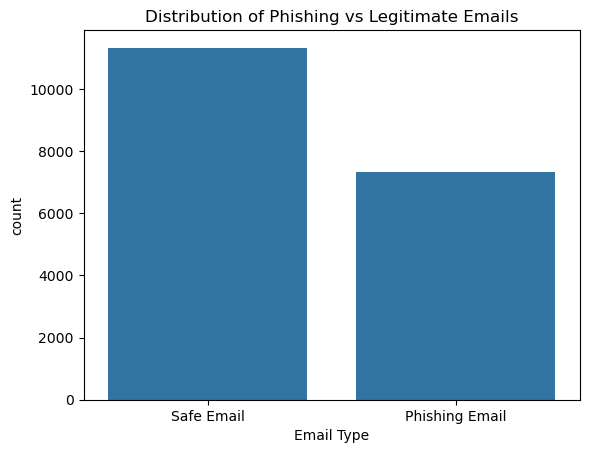

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (make sure the CSV file is in the same directory)
df = pd.read_csv("Phishing_Email.csv")  

# Quick look at data
print("Dataset shape:", df.shape)
display(df.head())

# Basic info
df.info()
display(df.describe())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Automatically detect target column 
possible_targets = ['Label', 'Email Type', 'Email Type (Phishing/Safe)', 'Class', 'isPhishing']
target_col = None
for col in possible_targets:
    if col in df.columns:
        target_col = col
        break

if target_col is None:
    target_col = df.columns[-1]  # fallback if nothing found

print(f"\n Target column detected: {target_col}")
print(df[target_col].value_counts())

# ----- Target distribution -----
sns.countplot(x=target_col, data=df)
plt.title("Distribution of Phishing vs Legitimate Emails")
plt.show()



 2. Implementation of the necessary pre-processing

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Detect text column automatically
if 'Email Text' in df.columns:
    text_col = 'Email Text'
elif 'EmailBody' in df.columns:
    text_col = 'EmailBody'
elif 'Body' in df.columns:
    text_col = 'Body'
else:
    text_col = df.columns[0]  # fallback if unsure

print(f"\n✅ Text column used: {text_col}")

# Replace missing text values with empty strings
df[text_col] = df[text_col].fillna("")

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df[text_col])

# Encode target variable
y = LabelEncoder().fit_transform(df[target_col])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n Data preprocessing complete.")
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])



✅ Text column used: Email Text

 Data preprocessing complete.
Training samples: 14920
Test samples: 3730


 3. Formalisation of the problem

### Problem :
The goal is to build a Machine Learning model that automatically detects phishing emails to reduce fraud and data theft risks.
The model analyzes email text to classify messages as phishing or legitimate, helping improve cybersecurity through automated detection.

 4. Selection of a baseline model and implementation of the model

Accuracy: 0.9514745308310992
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1466
           1       0.95      0.98      0.96      2264

    accuracy                           0.95      3730
   macro avg       0.95      0.94      0.95      3730
weighted avg       0.95      0.95      0.95      3730



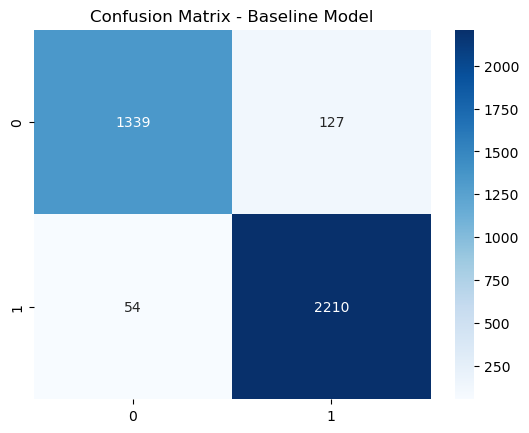

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a baseline model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Model")
plt.show()
